# Estimativa de redshift para mapeamento 3D do universo

### O redshift (desvio do vermelho) é utilizado na Astronomia como métrica para estimar o quão distante uma galáxia está da Terra.
### Ele é estimado a partir da comprimentos de onda emitidos pelos astros utilizando normalmente um espectrômetro.
Também é possível medir grosseiramente o redshift usando fotometria, a partir de uma amostra fotométrica de redshifts espectroscópicos como treinamento

In [76]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [77]:
df = pd.read_csv('input/data.csv',sep=',')

print(df.columns.values)

['ID' 'u' 'g' 'r' 'i' 'z' 'modelmagerr_u' 'modelmagerr_g' 'modelmagerr_r'
 'modelmagerr_i' 'modelmagerr_z' 'redshift']


In [78]:
df.head()

,ID,u,g,r,i,z,modelmagerr_u,modelmagerr_g,modelmagerr_r,modelmagerr_i,modelmagerr_z,redshift
0,1,20.05579,19.03638,18.33059,17.91299,17.70723,0.158691,0.026021,0.017158,0.015686,0.040499,0.186443
1,2,23.89449,19.98589,18.34053,17.72100,17.40883,1.956080,0.062189,0.018963,0.014417,0.032033,0.296161
2,3,20.48605,18.54287,17.45982,17.04516,16.80097,0.246165,0.018180,0.009551,0.008721,0.019908,0.178013
3,4,20.37043,18.14693,16.95750,16.53085,16.26944,0.179420,0.011766,0.006171,0.005637,0.011508,0.181958
4,5,17.67912,15.79491,14.93857,14.54253,14.23595,0.022103,0.003372,0.002708,0.002611,0.003838,0.039847


In [79]:
df.describe()

,ID,u,g,r,i,z,modelmagerr_u,modelmagerr_g,modelmagerr_r,modelmagerr_i,modelmagerr_z,redshift
count,436275.000000,436275.000000,436275.000000,436275.000000,436275.000000,436275.000000,436275.000000,436275.000000,436275.000000,436275.000000,436275.000000,436275.000000
mean,218138.000000,19.974695,18.271918,17.337510,16.915777,16.636066,0.202750,0.019408,0.009979,0.010528,0.027695,0.149871
std,125941.888683,1.677817,1.354717,1.132568,1.091613,1.102611,0.428930,0.185063,0.016162,0.113036,0.159566,0.115320
min,1.000000,11.397640,10.588240,9.731096,9.788093,8.984495,0.002102,0.001434,0.001426,0.001432,0.001461,0.000503
25%,109069.500000,18.979390,17.546245,16.784735,16.391570,16.101520,0.043858,0.006758,0.005241,0.005263,0.011819,0.074648
50%,218138.000000,19.722740,18.144210,17.332470,16.928380,16.641330,0.071800,0.009268,0.006808,0.006824,0.016625,0.116620
75%,327206.500000,20.565335,18.708550,17.697865,17.308900,17.076570,0.136097,0.013675,0.009293,0.009639,0.026264,0.178712
max,436275.000000,32.767230,32.491460,27.838990,29.517740,30.127820,69.460730,95.777590,4.801591,54.123270,53.628580,1.645000


/home/hypnos/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


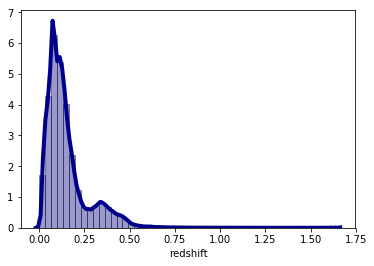

In [80]:
sns.distplot(df['redshift'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Performance metrics:

In [81]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [82]:
from sklearn.metrics import mean_squared_error

def mean_metric(y_test, pred):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = mean_squared_error(y_test, pred)
    
    # Return the score
    return score

## Model trainning:

In [83]:
#Dividing data in train/test
target = df['redshift']

In [84]:
df.drop('redshift', axis=1, inplace=True)

In [86]:
features = df.drop('ID', 1)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [89]:
#Random Forest Regression

regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train,y_train)
predicted = regressor.predict(X_test)

print('Model successfully trained.')

Model successfully trained.


In [90]:
random_forest_score = performance_metric(y_test,regressor.predict(X_test))
random_forest_error = mean_metric(y_test,regressor.predict(X_test))

print('R2 Score: ', random_forest_score * 100, '\nMean Error: ', random_forest_error * 100)

R2 Score:  91.19191944308258 
Mean Error:  0.11705452719345918


/home/hypnos/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


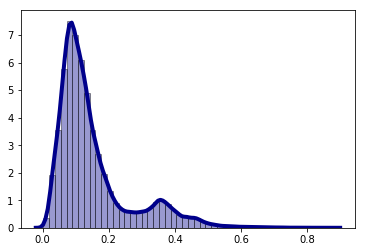

In [91]:
sns.distplot(predicted, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Predicting a new dataset:

In [93]:
test_df = pd.read_csv('input/query.csv',sep=',')
test_df.head()

,ID,u,g,r,i,z,modelmagerr_u,modelmagerr_g,modelmagerr_r,modelmagerr_i,modelmagerr_z
0,1,18.44576,17.42792,17.04441,16.84457,16.65202,0.059144,0.010632,0.011514,0.012076,0.030227
1,2,19.53878,18.54303,17.92247,17.52453,17.39197,0.085554,0.017542,0.011329,0.010053,0.030612
2,3,20.01489,18.17974,17.29804,16.89536,16.62627,0.113736,0.011341,0.007241,0.006545,0.015118
3,4,19.24964,17.25186,16.19505,15.76581,15.42115,0.090770,0.008102,0.004773,0.004271,0.008688
4,5,19.60299,18.11447,17.30755,16.89753,16.63263,0.166126,0.018490,0.011482,0.010039,0.026445


In [94]:
test_df = test_df.drop('ID', 1)

In [95]:
pred = regressor.predict(test_df)
test_df['redshift_pred'] = pred

In [96]:
test_df.loc[test_df['redshift_pred'] > 0.9].head()

,u,g,r,i,z,modelmagerr_u,modelmagerr_g,modelmagerr_r,modelmagerr_i,modelmagerr_z,redshift_pred
277982,25.823121,23.834864,22.324605,20.866951,19.925565,0.543862,0.524021,0.212255,0.097398,0.13601,0.9668
277984,25.823121,23.834864,22.324605,20.866951,19.925565,0.543862,0.524021,0.212255,0.097398,0.13601,0.9668
342587,20.702460,20.633540,20.074670,20.265990,20.870250,0.108541,0.074032,0.030454,0.055046,0.33159,0.9220


In [97]:
test_df.loc[test_df['redshift_pred'] < 0.1].head()

,u,g,r,i,z,modelmagerr_u,modelmagerr_g,modelmagerr_r,modelmagerr_i,modelmagerr_z,redshift_pred
0,18.44576,17.42792,17.04441,16.84457,16.65202,0.059144,0.010632,0.011514,0.012076,0.030227,0.036516
2,20.01489,18.17974,17.29804,16.89536,16.62627,0.113736,0.011341,0.007241,0.006545,0.015118,0.097233
11,19.18274,17.94016,17.32461,17.01094,16.80739,0.063354,0.010415,0.007973,0.008240,0.022063,0.092883
18,19.13323,18.07426,17.75239,17.44489,17.42784,0.038601,0.007803,0.007295,0.007490,0.020377,0.073458
55,19.38665,18.43661,18.11959,17.94363,17.85123,0.074778,0.013497,0.012693,0.014214,0.039984,0.068427


/home/hypnos/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


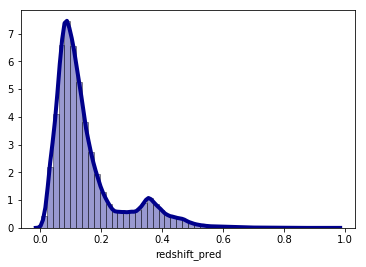

In [98]:
sns.distplot(test_df['redshift_pred'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})